### Import library

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

In [2]:
df = pd.read_csv('bank.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
df.shape

(4521, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


# EDA

### A. Transform job become employee and unemployee, 1 stands for employee and 0 stands for unemployee 

In [5]:
df['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

#### 1. Check how many unknown status

In [6]:
df[df['job'] == 'unknown'].shape

(38, 17)

#### There is only 38 for total 4521, so I will drop because is only 0,8% of data. The reason of dropping is job is essential feature to determine Marketing campaign

In [7]:
df = df[df['job'] != 'unknown']

##### Transform data

In [8]:
df['job'][df['job'] != 'unemployed'] =1
df['job'][df['job'] == 'unemployed'] =0

<ipython-input-8-e40b068200da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job'][df['job'] == 'unemployed'] =0


In [9]:
df["job"] = pd.to_numeric(df["job"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4483 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4483 non-null   int64 
 1   job        4483 non-null   int64 
 2   marital    4483 non-null   object
 3   education  4483 non-null   object
 4   default    4483 non-null   object
 5   balance    4483 non-null   int64 
 6   housing    4483 non-null   object
 7   loan       4483 non-null   object
 8   contact    4483 non-null   object
 9   day        4483 non-null   int64 
 10  month      4483 non-null   object
 11  duration   4483 non-null   int64 
 12  campaign   4483 non-null   int64 
 13  pdays      4483 non-null   int64 
 14  previous   4483 non-null   int64 
 15  poutcome   4483 non-null   object
 16  y          4483 non-null   object
dtypes: int64(8), object(9)
memory usage: 630.4+ KB


### B. Transform Marital status, 1 for Married and 0 for single

#### 1. Check how many status does marrital status has.

In [11]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

#### 2. Transform

In [12]:
df['marital'][df['marital'] == 'married'] = 1
df['marital'][df['marital'] != 'married'] = 0
df['marital'] = pd.to_numeric(df['marital'])

<ipython-input-12-c6e7be1a12ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marital'][df['marital'] == 'married'] = 1
<ipython-input-12-c6e7be1a12ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marital'][df['marital'] != 'married'] = 0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4483 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4483 non-null   int64 
 1   job        4483 non-null   int64 
 2   marital    4483 non-null   int64 
 3   education  4483 non-null   object
 4   default    4483 non-null   object
 5   balance    4483 non-null   int64 
 6   housing    4483 non-null   object
 7   loan       4483 non-null   object
 8   contact    4483 non-null   object
 9   day        4483 non-null   int64 
 10  month      4483 non-null   object
 11  duration   4483 non-null   int64 
 12  campaign   4483 non-null   int64 
 13  pdays      4483 non-null   int64 
 14  previous   4483 non-null   int64 
 15  poutcome   4483 non-null   object
 16  y          4483 non-null   object
dtypes: int64(9), object(8)
memory usage: 630.4+ KB


### C. Transform Education status to numeric

#### 1. Check how many status does education has

In [14]:
df['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

#### 2. Since education has unknown status, lets see how many of them that consist unknown

In [15]:
df[df['education'] == 'unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
20,38,1,0,unknown,no,0,yes,no,cellular,18,nov,96,2,-1,0,unknown,no
27,67,1,0,unknown,no,696,no,no,telephone,17,aug,119,1,105,2,failure,no
49,61,1,0,unknown,no,4629,yes,no,cellular,27,jan,181,1,92,1,success,yes
132,43,1,0,unknown,yes,-715,yes,no,unknown,30,may,67,3,-1,0,unknown,no
133,48,1,0,unknown,no,0,yes,no,cellular,8,may,85,1,168,2,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4337,73,1,0,unknown,no,519,no,no,telephone,16,oct,434,1,57,1,failure,yes
4342,50,1,0,unknown,no,2284,yes,no,telephone,31,jul,1088,17,-1,0,unknown,yes
4428,48,1,0,unknown,no,439,yes,no,cellular,2,feb,212,1,249,2,other,no
4471,59,1,0,unknown,no,3534,no,no,cellular,21,nov,216,4,-1,0,unknown,no


#### 3. transform unknown status to mode of education

In [16]:
#Find mode
df['education'].mode()

0    secondary
dtype: object

In [17]:
df['education'][df['education'] == 'unknown'] = 'secondary'

<ipython-input-17-909b71130b66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education'][df['education'] == 'unknown'] = 'secondary'


#### 4. Transform to numeric primary =1, secondary = 2, tertiary = 3

In [18]:
df['education'][df['education'] == 'primary'] = 1
df['education'][df['education'] == 'secondary'] = 2
df['education'][df['education'] == 'tertiary'] = 3
df['education'] = pd.to_numeric(df['education'])

<ipython-input-18-4932cfb8b409>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education'][df['education'] == 'primary'] = 1
<ipython-input-18-4932cfb8b409>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education'][df['education'] == 'secondary'] = 2
<ipython-input-18-4932cfb8b409>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education'][df['education'] == 'tertiary'] = 3


In [19]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0,0,1,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,1,0,2,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,1,0,3,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,1,0,3,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,1,0,2,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4483 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4483 non-null   int64 
 1   job        4483 non-null   int64 
 2   marital    4483 non-null   int64 
 3   education  4483 non-null   int64 
 4   default    4483 non-null   object
 5   balance    4483 non-null   int64 
 6   housing    4483 non-null   object
 7   loan       4483 non-null   object
 8   contact    4483 non-null   object
 9   day        4483 non-null   int64 
 10  month      4483 non-null   object
 11  duration   4483 non-null   int64 
 12  campaign   4483 non-null   int64 
 13  pdays      4483 non-null   int64 
 14  previous   4483 non-null   int64 
 15  poutcome   4483 non-null   object
 16  y          4483 non-null   object
dtypes: int64(10), object(7)
memory usage: 630.4+ KB


### D. Transform default value to numeric

#### 1. Check how many value does default has

In [21]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

#### 2. Transform no = 0, and yes = 1

In [22]:
df['default'][df['default'] == 'yes'] = 1
df['default'][df['default'] == 'no'] = 0
df['default'] = pd.to_numeric(df['default'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4483 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4483 non-null   int64 
 1   job        4483 non-null   int64 
 2   marital    4483 non-null   int64 
 3   education  4483 non-null   int64 
 4   default    4483 non-null   int64 
 5   balance    4483 non-null   int64 
 6   housing    4483 non-null   object
 7   loan       4483 non-null   object
 8   contact    4483 non-null   object
 9   day        4483 non-null   int64 
 10  month      4483 non-null   object
 11  duration   4483 non-null   int64 
 12  campaign   4483 non-null   int64 
 13  pdays      4483 non-null   int64 
 14  previous   4483 non-null   int64 
 15  poutcome   4483 non-null   object
 16  y          4483 non-null   object
dtypes: int64(11), object(6)
memory usage: 630.4+ KB


<ipython-input-22-3a5a7c9087c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['default'][df['default'] == 'yes'] = 1
<ipython-input-22-3a5a7c9087c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['default'][df['default'] == 'no'] = 0


### E. Transform housing ownerhip to numeric

#### 1. Check how many value does housing has

In [23]:
df['housing'].unique()

array(['no', 'yes'], dtype=object)

#### 2. Transform no = 0, and yes = 1

In [24]:
df['housing'][df['housing'] == 'yes'] = 1
df['housing'][df['housing'] == 'no'] = 0
df['housing'] = pd.to_numeric(df['housing'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4483 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4483 non-null   int64 
 1   job        4483 non-null   int64 
 2   marital    4483 non-null   int64 
 3   education  4483 non-null   int64 
 4   default    4483 non-null   int64 
 5   balance    4483 non-null   int64 
 6   housing    4483 non-null   int64 
 7   loan       4483 non-null   object
 8   contact    4483 non-null   object
 9   day        4483 non-null   int64 
 10  month      4483 non-null   object
 11  duration   4483 non-null   int64 
 12  campaign   4483 non-null   int64 
 13  pdays      4483 non-null   int64 
 14  previous   4483 non-null   int64 
 15  poutcome   4483 non-null   object
 16  y          4483 non-null   object
dtypes: int64(12), object(5)
memory usage: 630.4+ KB


<ipython-input-24-95a210b2b647>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['housing'][df['housing'] == 'yes'] = 1
<ipython-input-24-95a210b2b647>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['housing'][df['housing'] == 'no'] = 0


### F. Transform loan  to numeric

#### 1. Check how many value does loan has

In [25]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

#### 2. Transform no = 0, and yes = 1

In [26]:
df['loan'][df['loan'] == 'yes'] = 1
df['loan'][df['loan'] == 'no'] = 0
df['loan'] = pd.to_numeric(df['loan'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4483 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4483 non-null   int64 
 1   job        4483 non-null   int64 
 2   marital    4483 non-null   int64 
 3   education  4483 non-null   int64 
 4   default    4483 non-null   int64 
 5   balance    4483 non-null   int64 
 6   housing    4483 non-null   int64 
 7   loan       4483 non-null   int64 
 8   contact    4483 non-null   object
 9   day        4483 non-null   int64 
 10  month      4483 non-null   object
 11  duration   4483 non-null   int64 
 12  campaign   4483 non-null   int64 
 13  pdays      4483 non-null   int64 
 14  previous   4483 non-null   int64 
 15  poutcome   4483 non-null   object
 16  y          4483 non-null   object
dtypes: int64(13), object(4)
memory usage: 630.4+ KB


<ipython-input-26-2c1800626084>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan'][df['loan'] == 'yes'] = 1
<ipython-input-26-2c1800626084>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan'][df['loan'] == 'no'] = 0


### G. Transform contact to numeric

#### 1. Check how many value does Contact has

In [27]:
df['contact'].unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

#### 2. Fill unknown value with cellular

In [28]:
#Find mode
df['contact'].mode()

0    cellular
dtype: object

In [29]:
df['contact'][df['contact'] == 'cellular'] = 0
df['contact'][df['contact'] == 'unknown'] = 0
df['contact'][df['contact'] == 'telephone'] = 1
df['contact'] = pd.to_numeric(df['contact'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4483 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4483 non-null   int64 
 1   job        4483 non-null   int64 
 2   marital    4483 non-null   int64 
 3   education  4483 non-null   int64 
 4   default    4483 non-null   int64 
 5   balance    4483 non-null   int64 
 6   housing    4483 non-null   int64 
 7   loan       4483 non-null   int64 
 8   contact    4483 non-null   int64 
 9   day        4483 non-null   int64 
 10  month      4483 non-null   object
 11  duration   4483 non-null   int64 
 12  campaign   4483 non-null   int64 
 13  pdays      4483 non-null   int64 
 14  previous   4483 non-null   int64 
 15  poutcome   4483 non-null   object
 16  y          4483 non-null   object
dtypes: int64(14), object(3)
memory usage: 630.4+ KB


<ipython-input-29-6cf50dfcc42d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contact'][df['contact'] == 'cellular'] = 0
<ipython-input-29-6cf50dfcc42d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contact'][df['contact'] == 'unknown'] = 0
<ipython-input-29-6cf50dfcc42d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contact'][df['contact'] == 'telephone'] = 1


### H. Transform month to numeric

In [30]:
df['month'].unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [31]:
df['month'][df['month'] == 'jan'] = 1
df['month'][df['month'] == 'feb'] = 2
df['month'][df['month'] == 'mar'] = 3
df['month'][df['month'] == 'apr'] = 4
df['month'][df['month'] == 'may'] = 5
df['month'][df['month'] == 'jun'] = 6
df['month'][df['month'] == 'jul'] = 7
df['month'][df['month'] == 'aug'] = 8
df['month'][df['month'] == 'sep'] = 9
df['month'][df['month'] == 'oct'] = 10
df['month'][df['month'] == 'nov'] = 11
df['month'][df['month'] == 'dec'] = 12
df['month'] = pd.to_numeric(df['month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4483 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4483 non-null   int64 
 1   job        4483 non-null   int64 
 2   marital    4483 non-null   int64 
 3   education  4483 non-null   int64 
 4   default    4483 non-null   int64 
 5   balance    4483 non-null   int64 
 6   housing    4483 non-null   int64 
 7   loan       4483 non-null   int64 
 8   contact    4483 non-null   int64 
 9   day        4483 non-null   int64 
 10  month      4483 non-null   int64 
 11  duration   4483 non-null   int64 
 12  campaign   4483 non-null   int64 
 13  pdays      4483 non-null   int64 
 14  previous   4483 non-null   int64 
 15  poutcome   4483 non-null   object
 16  y          4483 non-null   object
dtypes: int64(15), object(2)
memory usage: 630.4+ KB


<ipython-input-31-894cee1015da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'][df['month'] == 'jan'] = 1
<ipython-input-31-894cee1015da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'][df['month'] == 'feb'] = 2
<ipython-input-31-894cee1015da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'][df['month'] == 'mar'] = 3
<ipython-input-31-894cee1015da>:4: SettingWithCopyWarning: 
A value is trying to b

### I. Transform POUTCOME to numeric

In [32]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [33]:
df['poutcome'][df['poutcome'] == 'success'] = 1
df['poutcome'][df['poutcome'] == 'other'] = 2
df['poutcome'][df['poutcome'] == 'unknown'] = 3
df['poutcome'][df['poutcome'] == 'failure'] = 0
df['poutcome'] = pd.to_numeric(df['poutcome'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4483 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4483 non-null   int64 
 1   job        4483 non-null   int64 
 2   marital    4483 non-null   int64 
 3   education  4483 non-null   int64 
 4   default    4483 non-null   int64 
 5   balance    4483 non-null   int64 
 6   housing    4483 non-null   int64 
 7   loan       4483 non-null   int64 
 8   contact    4483 non-null   int64 
 9   day        4483 non-null   int64 
 10  month      4483 non-null   int64 
 11  duration   4483 non-null   int64 
 12  campaign   4483 non-null   int64 
 13  pdays      4483 non-null   int64 
 14  previous   4483 non-null   int64 
 15  poutcome   4483 non-null   int64 
 16  y          4483 non-null   object
dtypes: int64(16), object(1)
memory usage: 630.4+ KB


<ipython-input-33-7b1a66e014a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['poutcome'][df['poutcome'] == 'success'] = 1
<ipython-input-33-7b1a66e014a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['poutcome'][df['poutcome'] == 'other'] = 2
<ipython-input-33-7b1a66e014a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['poutcome'][df['poutcome'] == 'unknown'] = 3
<ipython-input-33-7b1a66e014a1>:4: SettingWithCopyWarn

### I. Transform Y to numeric

In [34]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [35]:
df['y'][df['y'] == 'no'] = 0
df['y'][df['y'] == 'yes'] = 1
df['y'] = pd.to_numeric(df['y'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4483 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4483 non-null   int64
 1   job        4483 non-null   int64
 2   marital    4483 non-null   int64
 3   education  4483 non-null   int64
 4   default    4483 non-null   int64
 5   balance    4483 non-null   int64
 6   housing    4483 non-null   int64
 7   loan       4483 non-null   int64
 8   contact    4483 non-null   int64
 9   day        4483 non-null   int64
 10  month      4483 non-null   int64
 11  duration   4483 non-null   int64
 12  campaign   4483 non-null   int64
 13  pdays      4483 non-null   int64
 14  previous   4483 non-null   int64
 15  poutcome   4483 non-null   int64
 16  y          4483 non-null   int64
dtypes: int64(17)
memory usage: 630.4 KB


<ipython-input-35-7b81b342e76b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'][df['y'] == 'no'] = 0
<ipython-input-35-7b81b342e76b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'][df['y'] == 'yes'] = 1


#### SPLIT DATAFRAME X AND Y

In [36]:
df_x = df.iloc[:, 0:16]
df_y = df.iloc[:, 16:17]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3586, 16) (3586, 1)
(897, 16) (897, 1)


### KNN

In [38]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred  = neigh.predict(X_test)

<ipython-input-38-502a9140d140>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh.fit(X_train, y_train)


In [39]:
print(metrics.accuracy_score(y_test, y_pred))

0.8684503901895206


In [40]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

NameError: name 'k_range' is not defined

#### LOGISTIC REGRESSION

In [41]:
#FIT
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
logisticRegr.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [43]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.8784838350055741


#### SVM

In [44]:
clf = svm.SVC(kernel='linear')

In [45]:
clf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


KeyboardInterrupt: 

In [ ]:
y_pred = clf.predict(X_test)

#### NAIVE BAYES

In [48]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


#### DECISION TREE

In [51]:
clf = tree.DecisionTreeClassifier()

In [52]:
clf = clf.fit(X_train, y_train)

[Text(218.53011967670045, 212.26285714285714, 'X[11] <= 632.5\ngini = 0.2\nsamples = 3586\nvalue = [3183, 403]'),
 Text(136.3020292055783, 201.90857142857143, 'X[11] <= 221.5\ngini = 0.147\nsamples = 3287\nvalue = [3025, 262]'),
 Text(62.245187025569315, 191.5542857142857, 'X[0] <= 60.5\ngini = 0.063\nsamples = 2111\nvalue = [2042, 69]'),
 Text(22.833162704754294, 181.2, 'X[0] <= 19.5\ngini = 0.055\nsamples = 2064\nvalue = [2006, 58]'),
 Text(9.63068318018378, 170.84571428571428, 'X[12] <= 2.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(8.56060727127447, 160.49142857142857, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(10.700759089093088, 160.49142857142857, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(36.03564222932481, 170.84571428571428, 'X[15] <= 1.5\ngini = 0.053\nsamples = 2061\nvalue = [2005, 56]'),
 Text(12.840910906911706, 160.49142857142857, 'X[13] <= 99.5\ngini = 0.156\nsamples = 270\nvalue = [247, 23]'),
 Text(6.955493407910508, 150.13714285714286, 'X[5] <=

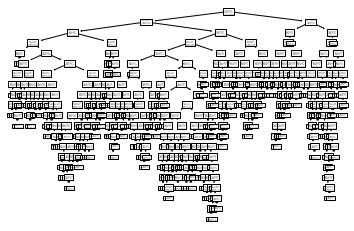

In [53]:
tree.plot_tree(clf) 

# 